In [42]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid")
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# Need to reshape befor applying the scaler.
# scaler = StandardScaler()
# scaler.fit(feat_train)
# train_X = scaler.transform(feat_train)
# test_X = scaler.transform(feat_test)


In [2]:
print(train_X.shape)

(60000, 28, 28)


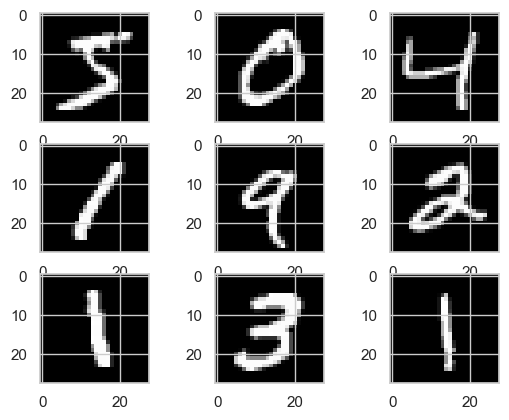

In [43]:
from matplotlib import pyplot
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [55]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
import seaborn as sb

def NBayes(train_feature, train_label, test_feature, test_label):
        mean_list = [] 
        std_list = []
        prior = []
        count = []
        prediction = []
        likelihood = []
        for i, val in enumerate(np.unique(train_label)):
            is_equal = [train_label == val] 
            count.append(len(train_label[[train_label == val] ]))
            prior.append(len(train_label[[train_label == val] ]) / len(train_label))
            mean_list.append(np.mean(train_feature[[train_label == val] ], axis=0))
            std_list.append(np.std(train_feature[[train_label == val] ], axis=0))
        
        
        for n in range(len(test_label)):
            classifier = []
            for i, val in enumerate(np.unique(train_label)):
                m1 = mean_list[i]
                var = np.square(std_list[i]) + 1000
                prob = 1 / np.sqrt(2 * np.pi * var) * np.exp(-np.square(test_feature[n]  - m1)/(2 * var))
                result = np.sum(np.log(prob))
                classifier.append(result)

            prediction.append(np.argmax(classifier))
        
        return prediction


In [57]:
# train the model
import pandas as pd


nb = NBayes(train_X, train_y, test_X, test_y)



C:\Users\aditt\AppData\Local\Temp\ipykernel_24124\3857493661.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  count.append(len(train_label[[train_label == val] ]))
C:\Users\aditt\AppData\Local\Temp\ipykernel_24124\3857493661.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  prior.append(len(train_label[[train_label == val] ]) / len(train_label))
C:\Users\aditt\AppData\Local\Temp\ipykernel_24124\3857493661.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `

In [6]:
nb_pred = nb[0]


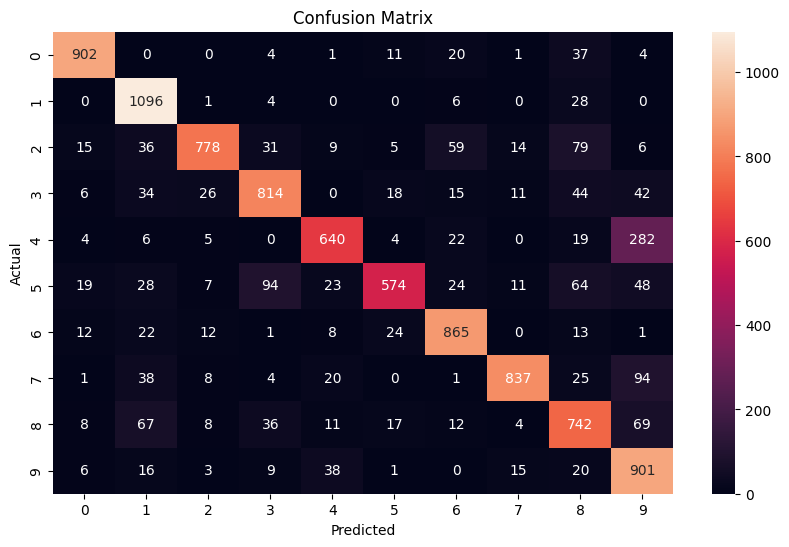

In [7]:
cmm = confusion_matrix(test_y, nb_pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()

In [8]:
print("Test Accuracy:", round((sum(np.diagonal(cm)) / len(nb_pred)) * 100, 4), '%')


Test Accuracy: 81.49 %


In [47]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
nsamples, nx, ny = train_X.shape
d2_train_dataset = train_X.reshape((nsamples,nx*ny))

logisticRegr.fit(d2_train_dataset, train_y)


C:\Users\aditt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
nsamples, nx, ny = test_X.shape
d2_train_dataset = test_X.reshape((nsamples,nx*ny))
pred = logisticRegr.predict(d2_train_dataset.reshape((nsamples,nx*ny)))


In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred)

0.9255

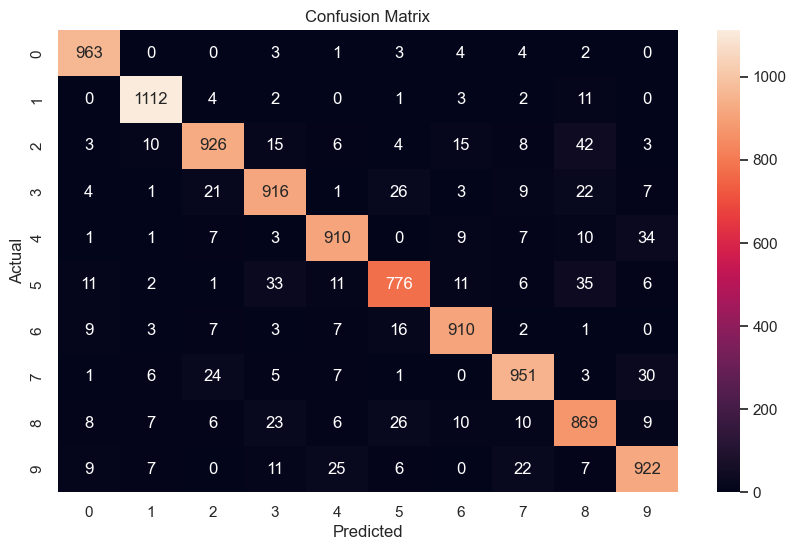

In [50]:
cm = confusion_matrix(test_y, pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()

In [12]:
d2_train_dataset.shape

(10000, 784)

In [13]:
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv,ResGatedGraphConv,GatedGraphConv
import torch
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
from torch.nn import Sequential as Seq, Linear as Lin, ReLU
import torch_geometric
from sklearn.model_selection import KFold

C:\Users\aditt\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack1 = nn.Sequential(
            nn.LayerNorm(feat_train.shape[1]),
            nn.Linear(feat_train.shape[1], 256),
            nn.ReLU(),
            nn.Dropout( p = 0.15),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout( p = 0.5),
            nn.Linear(64, 10),
            nn.ReLU()
        )

    def forward(self, x):

        x = self.linear_relu_stack1(x)


        return x

nsamples, nx, ny = train_X.shape
feat_train = torch.FloatTensor(train_X.reshape((nsamples,nx*ny)))
model = GCN()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.013, weight_decay = 5e-6)
scheduler =torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
acc = []
a_T = 0
#feat_train.to(d)
for epoch in range(100):
    optimizer.zero_grad()
    out = model(feat_train)
    loss = F.cross_entropy(out, torch.LongTensor(train_y))
    print(loss)
    loss.backward()
    optimizer.step() 
        

tensor(2.3111, grad_fn=<NllLossBackward0>)
tensor(355.1425, grad_fn=<NllLossBackward0>)
tensor(106.2336, grad_fn=<NllLossBackward0>)
tensor(23.7460, grad_fn=<NllLossBackward0>)
tensor(6.7881, grad_fn=<NllLossBackward0>)
tensor(2.6964, grad_fn=<NllLossBackward0>)
tensor(2.3254, grad_fn=<NllLossBackward0>)
tensor(2.1977, grad_fn=<NllLossBackward0>)
tensor(2.1576, grad_fn=<NllLossBackward0>)
tensor(1.6671, grad_fn=<NllLossBackward0>)
tensor(1.5930, grad_fn=<NllLossBackward0>)
tensor(1.3232, grad_fn=<NllLossBackward0>)
tensor(1.2117, grad_fn=<NllLossBackward0>)
tensor(1.1102, grad_fn=<NllLossBackward0>)
tensor(1.0763, grad_fn=<NllLossBackward0>)
tensor(1.0369, grad_fn=<NllLossBackward0>)
tensor(1.0492, grad_fn=<NllLossBackward0>)
tensor(0.9417, grad_fn=<NllLossBackward0>)
tensor(0.9221, grad_fn=<NllLossBackward0>)
tensor(0.8652, grad_fn=<NllLossBackward0>)
tensor(0.8793, grad_fn=<NllLossBackward0>)
tensor(0.8707, grad_fn=<NllLossBackward0>)
tensor(0.9390, grad_fn=<NllLossBackward0>)
tensor

0.951
0 1002
1 1137
2 1034
3 1056
4 1052
5 850
6 958


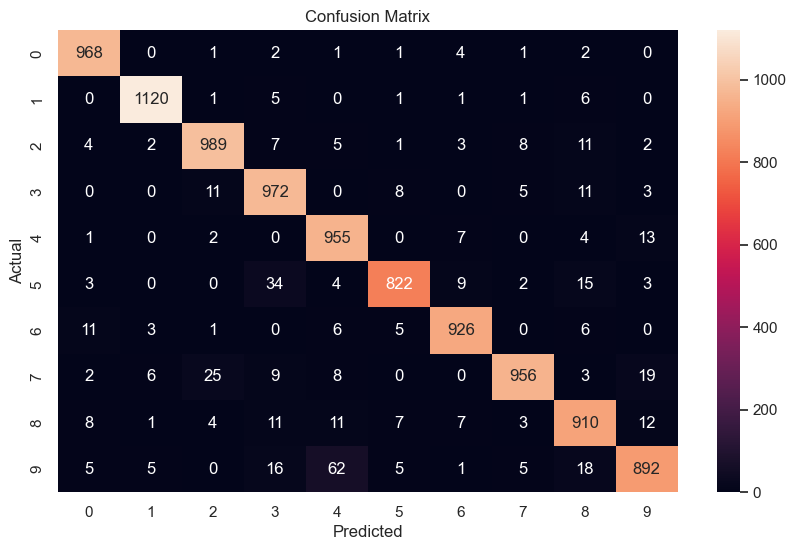

In [51]:
model.eval() 
nsamples, nx, ny = test_X.shape
feat_test = torch.FloatTensor(test_X.reshape((nsamples,nx*ny)))
our_x = torch.FloatTensor(feat_test)

pred = model(feat_test).argmax(dim=1)
from sklearn.metrics import accuracy_score
print(accuracy_score(pred, test_y))  
for i in range(7):
    print(i, pred.tolist().count(i))
cm = confusion_matrix(test_y, pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()    

In [36]:
from sklearn.decomposition import PCA
pca = PCA(.95)
principalComponents_train = pca.fit_transform(feat_train)
principalComponents_test = pca.transform(feat_test)
nb = naivebayes(principalComponents_train, train_y, principalComponents_test, test_y, smoothing=1000)
nb_pred = nb[0]

C:\Users\aditt\AppData\Local\Temp\ipykernel_24124\2073747906.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  count.append(len(tr_lb[sep]))
C:\Users\aditt\AppData\Local\Temp\ipykernel_24124\2073747906.py:30: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  prior.append(len(tr_lb[sep]) / len(tr_lb))
C:\Users\aditt\AppData\Local\Temp\ipykernel_24124\2073747906.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as a

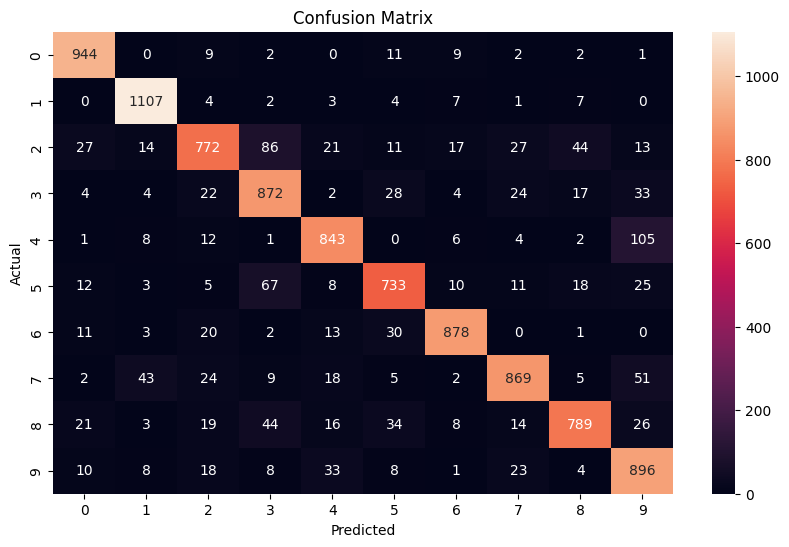

Test Accuracy: 87.03 %


In [37]:
cm = confusion_matrix(test_y,  nb[0])
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()
print("Test Accuracy:", round((sum(np.diagonal(cm)) / len(nb_pred)) * 100, 4), '%')


In [38]:
logisticRegr = LogisticRegression()
nsamples, nx, ny = train_X.shape
d2_train_dataset = train_X.reshape((nsamples,nx*ny))

logisticRegr.fit(principalComponents_train, train_y)

C:\Users\aditt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
pred = logisticRegr.predict(principalComponents_test)


In [40]:
accuracy_score(test_y, pred)

0.9201

In [44]:
from sklearn.svm import SVC
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(feat_train, train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [52]:
pred = clf.predict(feat_test)

In [53]:
accuracy_score(test_y, pred)

0.9665

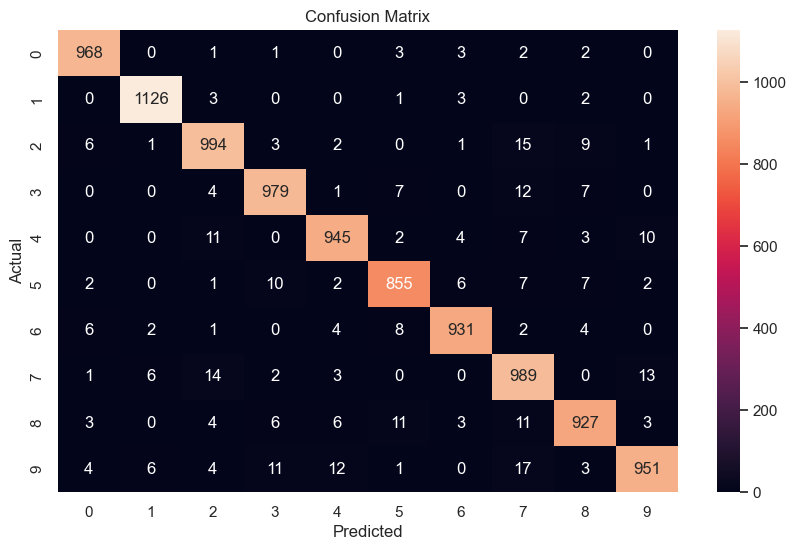

In [54]:
cm = confusion_matrix(test_y, pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()